In [1]:
! pip install numpy panda matplotlib

  Using cached panda-0.3.1-py3-none-any.whl
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cached charset_normalizer-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (146 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle  # For saving and loading Q-values

In [3]:
# Simulation parameters
NUM_DRONES = 4  # Number of drones in the simulation
GRID_SIZE = 20   # Size of the search grid
BETA = 0.8  # Softmax temperature parameter
ALPHA = 0.8  # Weight between individual and cooperative rewards

# Priority map is now input, no need for discovery
PRIORITY_MAP = np.random.randint(1, 2, (GRID_SIZE, GRID_SIZE))  # Predefined heatmap
SEARCHED_MAP = np.zeros((GRID_SIZE, GRID_SIZE))  # Track searched areas
global_visited = []

In [4]:
class Drone:
    def __init__(self, drone_id):
        self.id = drone_id  # Unique identifier for the drone
        self.position = np.random.randint(0, GRID_SIZE, size=2)  # Initial random position
        self.cumulative_reward = 0  # Keep track of total search priority collected
        self.visited_positions = [tuple(self.position)]  # Track visited positions
        self.active = True  # Drone status
    
    def compute_reward(self, new_position):
        """ Compute reward using the weighted individual and cooperative components """
        R_ind = PRIORITY_MAP[new_position[0], new_position[1]]
        R_coop = 1 / (1 + SEARCHED_MAP[new_position[0], new_position[1]])  # Incentivize unexplored areas
        return ALPHA * R_ind + (1 - ALPHA) * R_coop
    
    def softmax_policy(self, available_actions):
        """ Select action based on softmax over Q-values """
        q_values = np.array([self.compute_reward(pos) for pos in available_actions])
        exp_q = np.exp(BETA * q_values)
        probabilities = exp_q / np.sum(exp_q)
        return available_actions[np.random.choice(len(available_actions), p=probabilities)]
    
    def update_position(self):
        """ Move towards an area based on softmax action selection """
        if not self.active:
            return
        
        search_directions = [
            np.array([1, 0]), np.array([-1, 0]),
            np.array([0, 1]), np.array([0, -1])
        ]
        
        available_actions = []
        for direction in search_directions:
            new_position = self.position + direction
            if 0 <= new_position[0] < GRID_SIZE and 0 <= new_position[1] < GRID_SIZE:
                available_actions.append(new_position)
        
        if available_actions:
            best_move = self.softmax_policy(available_actions)
            self.position = best_move
            self.cumulative_reward += self.compute_reward(best_move)
            SEARCHED_MAP[self.position[0], self.position[1]] += 10000000  # Mark as searched
        
        self.visited_positions.append(tuple(self.position))
        global_visited.append(tuple(self.position))

def run_simulation():
    """ Run the search and visualization of drone movement in real time """
    drones = [Drone(i) for i in range(NUM_DRONES)]  # Initialize drones
    
    plt.ion()  # Enable interactive mode for real-time plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    
    iteration = 0
    while True:
        ax.clear()
        ax.imshow(PRIORITY_MAP, cmap='hot', origin='lower', alpha=0.5)  # Display priority map
        ax.imshow(SEARCHED_MAP, cmap='cool', origin='lower', alpha=0.25)  # Overlay search progress
        
        for drone in drones:
            drone.update_position()
            path = np.array(drone.visited_positions)
            ax.plot(path[:, 1], path[:, 0], linestyle='--', marker='o', markersize=3, label=f'Drone {drone.id}')
        
        ax.set_xlim(-1, GRID_SIZE)
        ax.set_ylim(-1, GRID_SIZE)
        ax.set_title(f"Iteration {iteration + 1}")
        ax.legend()
        ax.grid()
        plt.draw()
        plt.pause(0.1)  # Pause for a short duration to simulate real-time updates
        iteration += 1


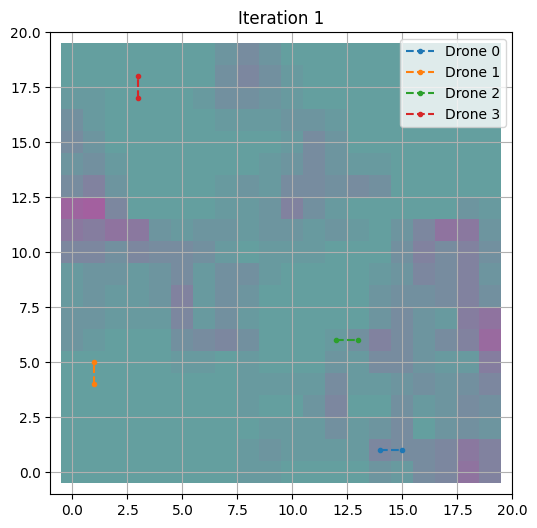

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [6]:
run_simulation()